In [3]:
import requests
import pandas as pd
import numpy


def get_historic_price(symbol, exchange='bitfinex', after='2019-01-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    # print(url)
    response = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    response.raise_for_status()
    data = response.json()
    # print(data)
    df = pd.DataFrame(data['result']['3600'],columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df


last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
# print(last_week)
btc = get_historic_price('btc', 'bitstamp', after=last_week)
eth = get_historic_price('eth', 'bitstamp', after=last_week)



In [10]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,9145.177414,9183.660575,9108.964943,9147.222184,308.374837,2.818954e+06
std,261.176622,259.743893,265.934668,262.853917,292.648081,2.666291e+06
min,8689.150000,8764.880000,8630.000000,8691.010000,17.976536,1.655274e+05
25%,8886.550000,8924.500000,8851.512500,8888.812500,115.113127,1.097297e+06
50%,9165.055000,9200.510000,9131.965000,9164.260000,224.443188,2.044209e+06
75%,9400.970000,9442.687500,9371.502500,9410.265000,370.506802,3.481517e+06
max,9581.490000,9625.010000,9537.980000,9577.380000,1992.013147,1.774721e+07


In [6]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-05-23 13:00:00,9184.95,9185.84,9084.83,9138.43,223.083675,2.037688e+06
2020-05-23 14:00:00,9129.01,9176.21,9113.99,9152.49,94.935873,8.685233e+05
2020-05-23 15:00:00,9152.45,9224.24,9140.70,9198.45,98.526810,9.056014e+05
2020-05-23 16:00:00,9205.03,9216.08,9167.20,9202.20,84.541885,7.772505e+05
2020-05-23 17:00:00,9198.08,9216.08,9139.01,9180.00,123.309338,1.130777e+06


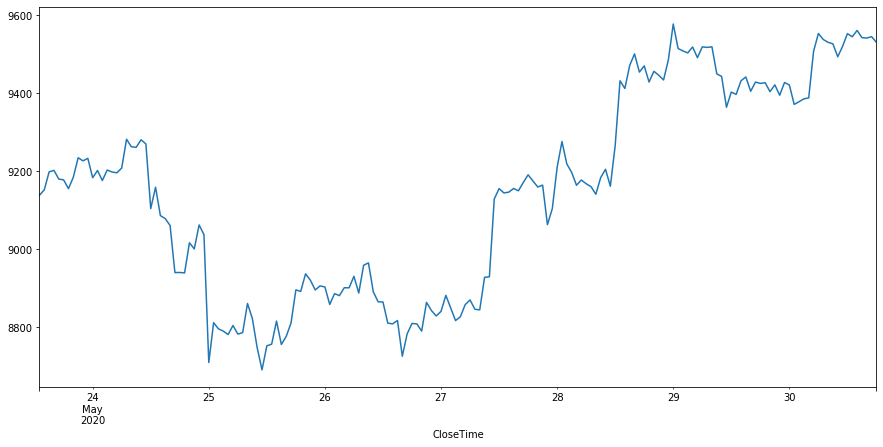

In [4]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [7]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-05-23 13:00:00,207.10,207.23,204.82,206.09,1093.368949,224790.755085
2020-05-23 14:00:00,205.83,207.02,205.83,205.86,640.831052,132284.932191
2020-05-23 15:00:00,205.63,208.12,205.46,207.71,1034.604859,214229.424075
2020-05-23 16:00:00,207.76,208.12,206.78,207.24,307.906820,63918.957773
2020-05-23 17:00:00,207.93,208.44,205.75,206.76,450.978300,93199.400218


In [14]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p1 = figure(x_axis_type='datetime', title='Crypto Prices', width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label='Date'
p1.yaxis.axis_label='Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bicoin')
p1.legend.location = 'top_left'

show(p1)

Loading BokehJS ...

In [16]:
writer = pd.ExcelWriter('C:/Users/dipta/OneDrive/Documents/Work/Python-Data Science/CryptoData.xlsx')
btc.to_excel(writer, 'Bitcoin')
writer.save()